# Example 2: Free energy surface

This notebook is used to introduce the free energy surface (FES) calculation using the `xdatbus` package.

## 1D FES

In [ ]:
import os
from xdatbus import fes_1d

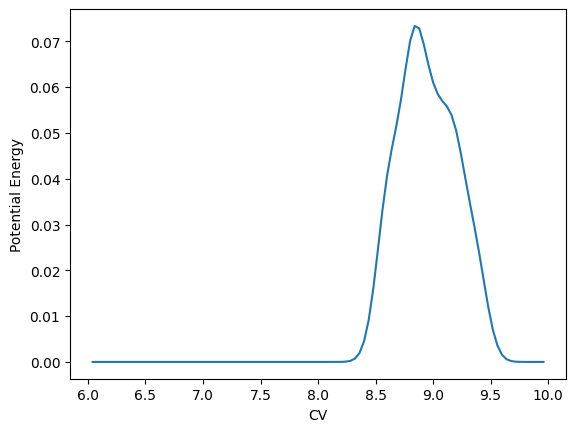

In [ ]:
input_line_number = 10
fes = fes_1d(
    "../tests/data/hillspot/HILLSPOT_1D",
    input_line_number,
    cv_range=[6, 10],
    resolution=100,
)

# plot the free energy profile
from matplotlib import pyplot as plt

plt.plot(fes["cv"], fes["potential_energy"])
plt.xlabel("CV")
plt.ylabel("Potential Energy")

plt.show()

## 2D FES

In [ ]:
from xdatbus import fes_2d

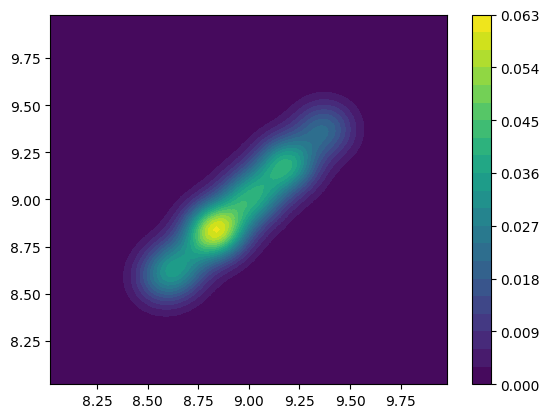

In [ ]:
fes = fes_2d(
    "../tests/data/hillspot/HILLSPOT_2D",
    10,
    [8, 10],
    [8, 10],
    resolution=100,
)

from matplotlib import pyplot as plt

# plot the free energy profile in 2D
fig = plt.figure()
plt.tricontourf(fes["cv_1"], fes["cv_2"], fes["potential_energy"], 20)
plt.colorbar()
plt.show()

## 3D FES

In [4]:
from xdatbus import fes_3d
import matplotlib.pyplot as plt
import numpy as np

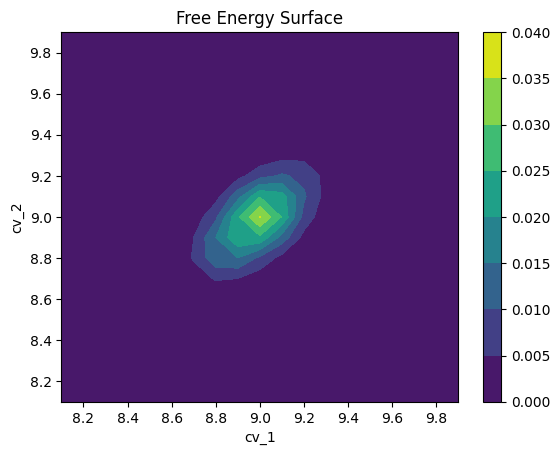

In [5]:
fes = fes_3d(
    hillspot_path="../tests/data/hillspot/HILLSPOT_3D",
    hills_count=9,
    cv_1_range=[8, 10],
    cv_2_range=[8, 10],
    cv_3_range=[8, 10],
    resolution=20,
)

unique_cv_3_values = fes["cv_3"].unique()
central_slice_cv_3 = unique_cv_3_values[np.abs(unique_cv_3_values - 9).argmin()]

fes_closest = fes[fes["cv_3"] == central_slice_cv_3]

if not fes_closest.empty:
    fes_pivot = fes_closest.pivot(
        index="cv_1", columns="cv_2", values="potential_energy"
    )

    fes_pivot = fes_pivot.sort_index(ascending=False)

    plt.contourf(
        fes_pivot.columns, fes_pivot.index, fes_pivot.values, cmap="viridis"
    )
    plt.colorbar()
    plt.xlabel("cv_1")
    plt.ylabel("cv_2")
    plt.title(f"Free Energy Surface")
    plt.show()